In [68]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import random
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

1.2.0


In [69]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from tensorflow import keras 

In [96]:
model_regr = keras.models.load_model('../models/regression/large_mse.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-100.h5')

In [89]:
def gen_electron(dimx, dimy, p1):
    x1 = random.uniform(dimx[0], dimx[1])
    x2 = random.uniform(dimy[0], dimy[1])
    return np.array([p1, 0, 0, x1, x2])

In [90]:
def gen_photon(dimx, dimy, modulus):
    x1 = random.uniform(dimx[0], dimx[1])
    x2 = random.uniform(dimy[0], dimy[1])
    costheta = random.uniform(-1, 1)
    cosphi = random.random()
    proj_xy = cosphi*modulus
    return np.array([proj_xy*costheta, proj_xy*np.sqrt(1-costheta**2), modulus*np.sqrt(1-cosphi**2), x1, x2])

In [135]:
x = 2
y = 2
p_e = 0.1
p_pho = 0.025  
nodes_x = 2
nodes_y = 2
dx = x/nodes_x
dy = y/nodes_y
per_node = 100
threshold = 0.5

In [136]:
def node_operation(node_x, node_y, dx, dy, threshold, p_e, p_pho, per_node):
    print("x: {}, y: {}".format(node_x, node_y))
    photon_final = []
    lim_x_min = dx* node_x
    lim_x_max = (dx+1)*node_x 
    lim_y_min = dy* node_y
    lim_y_max = (dy+1)*node_y
    for n in range(per_node):
        electron = gen_electron([lim_x_min, lim_x_max], [lim_y_min, lim_y_max], p_e)
        photon = gen_photon([lim_x_min, lim_x_max], [lim_y_min, lim_y_max], p_pho)
        class_x = np.array([[electron[0], electron[1], electron[2],
                      photon[0], photon[1], photon[2],
                      electron[3], electron[4],
                      photon[3], photon[4]]])
        classification = model_class.predict(np.stack(class_x))
        if classification >= threshold:
            regr_x = np.array([class_x[0,:6]])
            regr_data = model_regr.predict(regr_x)
            photon_final.append(np.linalg.norm(regr_data[0]))
    return np.array(photon_final)


In [ ]:
args = [(x, y, dx, dy, threshold, p_e, p_pho, per_node) for x in range(nodes_x) for y in range(nodes_y)]
results = np.array([])
for arg in args:
    result = np.concatenate((results, node_operation(*arg)))

x: 0, y: 0
x: 0, y: 1


In [134]:
results

array([], dtype=float64)

In [ ]:
for node_x in range(nodes_x):
    print("node_x n: {0} out of {1}".format(node_x, nodes_x))
    lim_x_min = dx* node_x
    lim_x_max = (dx+1)*node_x
    for node_y in range(nodes_y):
        print("node_y n: {0} out of {1}".format(node_y, nodes_y))
        for n in range(per_node):
            lim_y_min = dy* node_y
            lim_y_max = (dy+1)*node_y
            electron = gen_electron([lim_x_min, lim_x_max], [lim_y_min, lim_y_max], p_e)
            photon = gen_photon([lim_x_min, lim_x_max], [lim_y_min, lim_y_max], p_pho)
            class_x = np.array([[electron[0], electron[1], electron[2],
                          photon[0], photon[1], photon[2],
                          electron[3], electron[4],
                          photon[3], photon[4]]])
            classification = model_class.predict(np.stack(class_x))
            if classification >= threshold:
                regr_x = np.array([class_x[0,:6]])
                regr_data = model_regr.predict(regr_x)
                photon_final.append(np.linalg.norm(regr_data[0]))
            else:
                photon_final.append(np.linalg.norm([photon[0], photon[1], photon[2]]))

In [10]:
np.array(photon_final)

array([0.1       , 0.1       , 0.1       , ..., 0.07167751, 0.07562365,
       0.06787068])

In [11]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins)
    plt.yscale("log")
    plt.show()

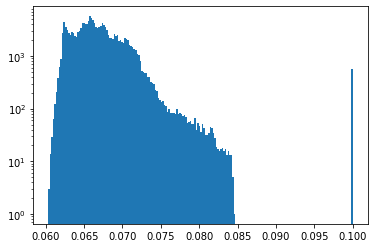

In [12]:
energy_spectrum(photon_final, 200)

In [1]:
plt.hist(photon_final, 100, alpha=0.5, label='Energy Spectrum Photons', density = True)
#plt.xlabel('Photon Momentum')
#plt.ylabel('count')
#plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
#plt.ylim((0, 1000))
plt.show()

NameError: name 'plt' is not defined